# Semiconductor Detector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.odr import *
import pandas as pd

In [2]:
def peak_seeker(array, a, b): # finds maximum value of given interval of an array and its index
    arr = array[a:b]
    max_channel = np.argmax(arr) + a
    max_count = array[max_channel]
    return max_channel, max_count

Text(0.5, 1.0, '$\\gamma$-spectrum of Am-241')

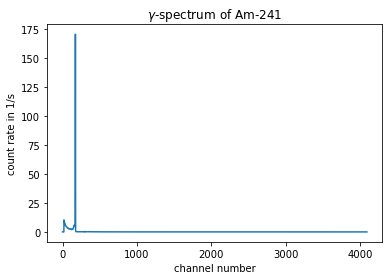

In [3]:
data_GammaSpectrumAm241 = pd.read_csv("Data/GammaSpectrumAm241.Spe")
counts_GammaSpectrumAm241 = np.array(data_GammaSpectrumAm241['$SPEC_ID:'][11:4107], dtype=int)
channels = np.arange(0,len(counts_GammaSpectrumAm241),1)
channels_err = 0.5*np.ones(len(channels))
time_GammaSpectrumAm241 = np.array([int(s) for s in data_GammaSpectrumAm241['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_GammaSpectrumAm241 = counts_GammaSpectrumAm241/time_GammaSpectrumAm241
plt.plot(channels, rate_GammaSpectrumAm241)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Am-241')

Text(0.5, 1.0, '$\\gamma$-spectrum of Ba-133')

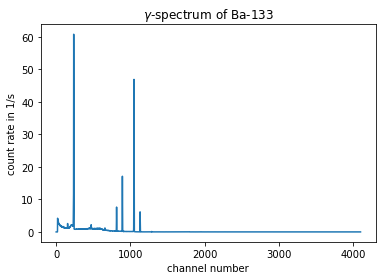

In [4]:
data_GammaSpectrumBa133 = pd.read_csv("Data/GammaSpectrumBa133.Spe")
data_GammaSpectrumBa133LongCount = pd.read_csv("Data/GammaSpectrumBa133LongCount.Spe")
counts_GammaSpectrumBa133 = np.array(data_GammaSpectrumBa133['$SPEC_ID:'][11:4107], dtype=int) + np.array(data_GammaSpectrumBa133LongCount['$SPEC_ID:'][11:4107], dtype=int)
time_GammaSpectrumBa133 = np.array([int(s) for s in data_GammaSpectrumBa133['$SPEC_ID:'][8].split() if s.isdigit()])[0] + np.array([int(s) for s in data_GammaSpectrumBa133LongCount['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_GammaSpectrumBa133 = counts_GammaSpectrumBa133/time_GammaSpectrumBa133
plt.plot(channels, rate_GammaSpectrumBa133)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Ba-133')

Text(0.5, 1.0, '$\\gamma$-spectrum of Co-60')

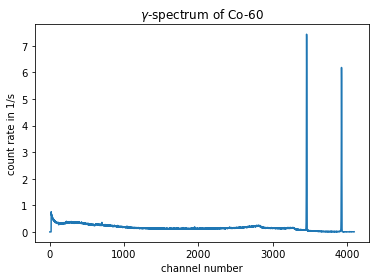

In [5]:
data_GammaSpectrumCo60 = pd.read_csv("Data/GammaSpectrumCo60.Spe")
counts_GammaSpectrumCo60 = np.array(data_GammaSpectrumCo60['$SPEC_ID:'][11:4107], dtype=int)
time_GammaSpectrumCo60 = np.array([int(s) for s in data_GammaSpectrumCo60['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_GammaSpectrumCo60 = counts_GammaSpectrumCo60/time_GammaSpectrumCo60
plt.plot(channels, rate_GammaSpectrumCo60)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Co-60')

Text(0.5, 1.0, '$\\gamma$-spectrum of Cs-137')

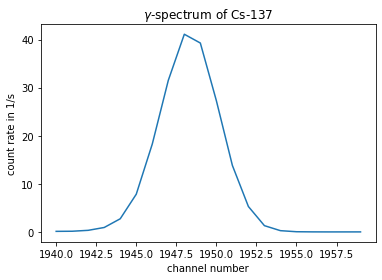

In [6]:
data_GammaSpectrumCs137 = pd.read_csv("Data/GammaSpectrumCs137.Spe")
counts_GammaSpectrumCs137 = np.array(data_GammaSpectrumCs137['$SPEC_ID:'][11:4107], dtype=int)
time_GammaSpectrumCs137 = np.array([int(s) for s in data_GammaSpectrumCs137['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_GammaSpectrumCs137 = counts_GammaSpectrumCs137/time_GammaSpectrumCs137
plt.plot(channels[1940:1960], rate_GammaSpectrumCs137[1940:1960])
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Cs-137')

Text(0.5, 1.0, '$\\gamma$-spectrum of Background')

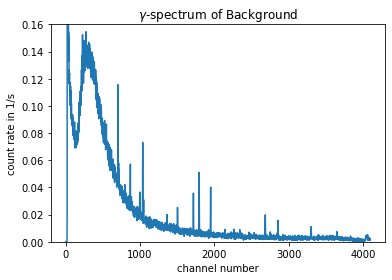

In [7]:
data_Background = pd.read_csv("Data/Background.Spe")
counts_Background = np.array(data_Background['$SPEC_ID:'][11:4107], dtype=int)
time_Background = np.array([int(s) for s in data_Background['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_Background = counts_Background/time_Background
plt.plot(channels, rate_Background)
plt.ylim(bottom=0, top=0.16)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Background')

In [8]:
time_Background

4949

##### We subtract the Backround from the data of the different sources

Text(0.5, 1.0, 'reduced $\\gamma$-spectrum of Am-241')

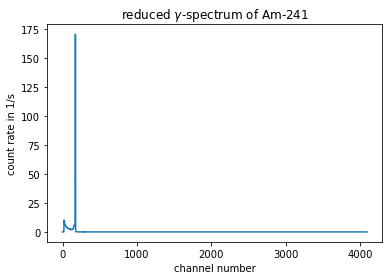

In [9]:
rate_GammaSpectrumAm241_red = rate_GammaSpectrumAm241 - rate_Background
rate_GammaSpectrumAm241_red_zero = rate_GammaSpectrumAm241_red.copy()
rate_GammaSpectrumAm241_red_zero[rate_GammaSpectrumAm241_red_zero < 0] = 0
plt.plot(channels, rate_GammaSpectrumAm241_red_zero)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('reduced $\gamma$-spectrum of Am-241')

Text(0.5, 1.0, '$\\gamma$-spectrum of Ba-133 (minus Background)')

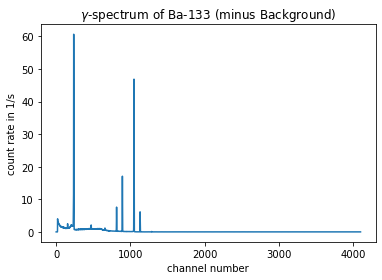

In [10]:
rate_GammaSpectrumBa133_red = rate_GammaSpectrumBa133 - rate_Background
rate_GammaSpectrumBa133_red_zero = rate_GammaSpectrumBa133_red.copy()
rate_GammaSpectrumBa133_red_zero[rate_GammaSpectrumBa133_red_zero < 0] = 0
plt.plot(channels, rate_GammaSpectrumBa133_red)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Ba-133 (minus Background)')

Text(0.5, 1.0, '$\\gamma$-spectrum of Co-60 (minus Background)')

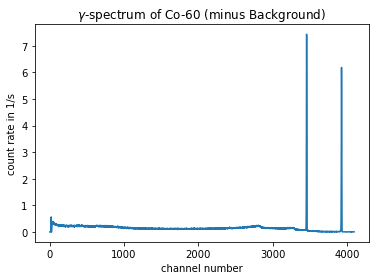

In [11]:
rate_GammaSpectrumCo60_red = rate_GammaSpectrumCo60 - rate_Background
rate_GammaSpectrumCo60_red_zero = rate_GammaSpectrumCo60_red.copy()
rate_GammaSpectrumCo60_red_zero[rate_GammaSpectrumCo60_red_zero < 0] = 0
plt.plot(channels, rate_GammaSpectrumCo60_red_zero)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Co-60 (minus Background)')

Text(0.5, 1.0, '$\\gamma$-spectrum of Cs-137 (minus Background)')

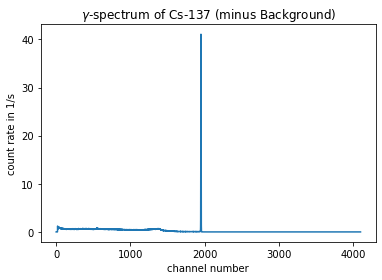

In [12]:
rate_GammaSpectrumCs137_red = rate_GammaSpectrumCs137 - rate_Background
rate_GammaSpectrumCs137_red_zero = rate_GammaSpectrumCs137_red.copy()
rate_GammaSpectrumCs137_red_zero[rate_GammaSpectrumCs137_red_zero < 0] = 0
plt.plot(channels, rate_GammaSpectrumCs137_red_zero)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Cs-137 (minus Background)')

# Calculating statistical counting error

In [13]:
# errors of count rates

def rate_err(array, t):
    y = np.sqrt(array)/t
    return y

In [14]:
rate_Background_err = rate_err(counts_Background, time_Background)
rate_GammaSpectrumAm241_err = rate_err(counts_GammaSpectrumAm241, time_GammaSpectrumAm241)
rate_GammaSpectrumBa133_err = rate_err(counts_GammaSpectrumBa133, time_GammaSpectrumBa133)
rate_GammaSpectrumCo60_err = rate_err(counts_GammaSpectrumCo60, time_GammaSpectrumCo60)
rate_GammaSpectrumCs137_err = rate_err(counts_GammaSpectrumCs137, time_GammaSpectrumCs137)
rate_GammaSpectrumAm241_red_err = np.sqrt(np.square(rate_GammaSpectrumAm241_err) + np.square(rate_Background_err))
rate_GammaSpectrumBa133_red_err = np.sqrt(np.square(rate_GammaSpectrumBa133_err) + np.square(rate_Background_err))
rate_GammaSpectrumCo60_red_err = np.sqrt(np.square(rate_GammaSpectrumCo60_err) + np.square(rate_Background_err))
rate_GammaSpectrumCs137_red_err = np.sqrt(np.square(rate_GammaSpectrumCs137_err) + np.square(rate_Background_err))

# Calibrating the energy scale
##### We compare the literature values of the sources to the channel numbers of the corresponing peaks in the spectra.

In [15]:
def gauss_fct(x, a, b, x0, sigma):
    y = a + b*np.exp(-(x-x0)**2/(2*sigma**2))
    return y

In [16]:
def gauss_fct_ODR(B, x):
    y = B[0] + B[1]*np.exp(-(x-B[2])**2/(2*B[3]**2))
    return y

In [17]:
def gauss_fit_ODR(x, y, x_err, y_err):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    gauss_model = Model(gauss_fct_ODR) # create model for ODR fitting
    data = RealData(x,y, sx = x_err, sy = y_err) # Create a RealData object
    odr = ODR(data, gauss_model, beta0=[min(y), max(y), mean, sigma])
    output = odr.run()
    return output.beta, output.sd_beta, output.res_var, output.stopreason

In [18]:
Am241_energies = np.array([59.5409])
Am241_peaks = np.array([np.argmax(rate_GammaSpectrumAm241_red)])
print(Am241_energies, Am241_peaks)

[59.5409] [173]


In [19]:
Am241_params = gauss_fit_ODR(channels[171:185], rate_GammaSpectrumAm241_red[171:185], channels_err[171:185], rate_GammaSpectrumAm241_red_err[171:185])
print(Am241_params)

(array([1.09068220e-01, 1.72104820e+02, 1.72766222e+02, 1.20313895e+00]), array([8.06642756e-03, 1.46876660e+01, 3.19792113e-01, 1.27587238e-01]), 1.8679472748556083, ['Sum of squares convergence'])


In [20]:
Ba133_energies = np.array([80.9979, 276.3989, 302.8508, 356.0129, 383.8485])
Ba133_peaks = np.array([peak_seeker(rate_GammaSpectrumBa133_red, 200, 300)[0], peak_seeker(rate_GammaSpectrumBa133_red, 800, 850)[0], peak_seeker(rate_GammaSpectrumBa133_red, 850, 1000)[0], peak_seeker(rate_GammaSpectrumBa133_red, 1000, 1100)[0], peak_seeker(rate_GammaSpectrumBa133_red, 1100, 1200)[0]])
print(Ba133_energies, Ba133_peaks)

[ 80.9979 276.3989 302.8508 356.0129 383.8485] [ 236  813  891 1047 1129]


In [21]:
Ba133_params1 = gauss_fit_ODR(channels[233:250], rate_GammaSpectrumBa133_red[233:250], channels_err[233:250], rate_GammaSpectrumBa133_red_err[233:250])
print(Ba133_params1)

(array([  0.73188776,  59.96394716, 236.05023908,   1.21777002]), array([0.00556651, 0.75575792, 0.13770014, 0.05969853]), 0.5199144697247888, ['Sum of squares convergence'])


In [22]:
Ba133_params2 = gauss_fit_ODR(channels[805:821], rate_GammaSpectrumBa133_red[805:821], channels_err[805:821], rate_GammaSpectrumBa133_red_err[805:821])
print(Ba133_params2)

(array([2.05864130e-01, 7.56358607e+00, 8.12674959e+02, 1.38075254e+00]), array([0.00440734, 0.4864678 , 0.14253741, 0.07038601]), 0.7950986770297762, ['Sum of squares convergence'])


In [23]:
Ba133_params3 = gauss_fit_ODR(channels[883:899], rate_GammaSpectrumBa133_red[883:899], channels_err[883:899], rate_GammaSpectrumBa133_red_err[883:899])
print(Ba133_params3)

(array([1.58784014e-01, 1.74166106e+01, 8.90621086e+02, 1.38309023e+00]), array([0.00346782, 1.01145694, 0.11398531, 0.05385003]), 0.5377910934859125, ['Sum of squares convergence'])


In [24]:
Ba133_params4 = gauss_fit_ODR(channels[1040:1055], rate_GammaSpectrumBa133_red[1040:1055], channels_err[1040:1055], rate_GammaSpectrumBa133_red_err[1040:1055])
print(Ba133_params4)

(array([5.91471055e-02, 4.71836092e+01, 1.04668926e+03, 1.57133337e+00]), array([0.00547463, 1.54594855, 0.11302691, 0.0452896 ]), 0.6646636518745953, ['Sum of squares convergence'])


In [25]:
Ba133_params5 = gauss_fit_ODR(channels[1122:1138], rate_GammaSpectrumBa133_red[1122:1138], channels_err[1122:1138], rate_GammaSpectrumBa133_red_err[1122:1138])
print(Ba133_params5)

(array([7.75930556e-03, 6.19531517e+00, 1.12873774e+03, 1.50986444e+00]), array([0.00214108, 0.32096343, 0.16428795, 0.07418772]), 1.1771193432514013, ['Iteration limit reached'])


In [26]:
Co60_energies = np.array([1173.228, 1332.492])
Co60_peaks = np.array([peak_seeker(rate_GammaSpectrumCo60_red, 3400, 3500)[0], peak_seeker(rate_GammaSpectrumCo60_red, 3900, 4000)[0]])
print(Co60_energies, Co60_peaks)

[1173.228 1332.492] [3455 3925]


In [27]:
Co60_params1 = gauss_fit_ODR(channels[3446:3469], rate_GammaSpectrumCo60_red[3446:3469], channels_err[3446:3469], rate_GammaSpectrumCo60_red_err[3446:3469])
print(Co60_params1)

(array([4.75941222e-02, 7.41321570e+00, 3.45515242e+03, 2.52307366e+00]), array([0.00287821, 0.12455503, 0.11951648, 0.05811682]), 1.023809049557394, ['Both sum of squares and parameter convergence'])


In [28]:
Co60_params2 = gauss_fit_ODR(channels[3917:3938], rate_GammaSpectrumCo60_red[3917:3938], channels_err[3917:3938], rate_GammaSpectrumCo60_red_err[3917:3938])
print(Co60_params2)

(array([3.19043730e-03, 6.19193519e+00, 3.92482815e+03, 2.57201900e+00]), array([0.00067737, 0.05153979, 0.06796236, 0.03347262]), 0.3063804392496718, ['Sum of squares convergence'])


In [29]:
Cs137_energies = np.array([661.657])
Cs137_peaks = np.array([peak_seeker(rate_GammaSpectrumCs137_red, 1800, 2100)[0]])
print(Cs137_energies, Cs137_peaks)

[661.657] [1948]


In [30]:
Cs137_params = gauss_fit_ODR(channels[1940:1965], rate_GammaSpectrumCs137_red[1940:1965], channels_err[1940:1965], rate_GammaSpectrumCs137_red_err[1940:1965])
print(Cs137_params)

(array([3.73179783e-03, 4.10913714e+01, 1.94806843e+03, 1.96038774e+00]), array([0.0016007 , 0.49765753, 0.13428808, 0.05322443]), 1.1467287649454068, ['Sum of squares convergence'])


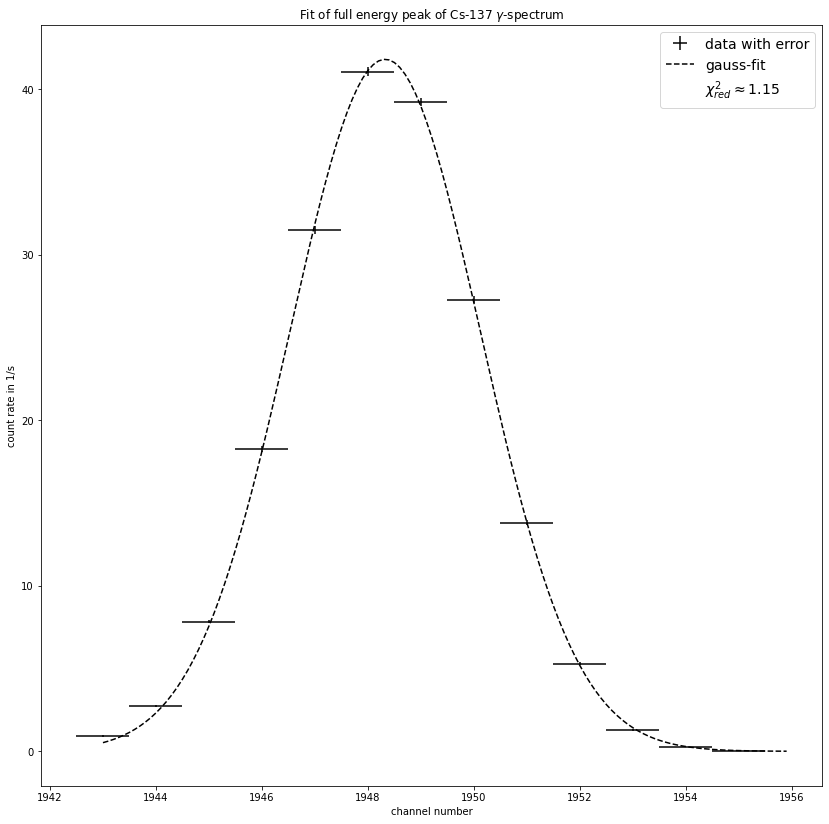

In [31]:
fig1, ax1 = plt.subplots(1, figsize=(14,14))

l1 = ax1.errorbar(channels[1943:1956],rate_GammaSpectrumCs137_red[1943:1956], xerr = channels_err[1943:1956], yerr = rate_GammaSpectrumCs137_red_err[1943:1956], linestyle='none', color='k')
l2, = ax1.plot(np.arange(1943, 1956, 0.1), gauss_fct(np.arange(1943, 1956, 0.1), 7.30239234e-03, 4.17969113e+01, 1.94832420e+03, 1.79807487e+00), color='k', linestyle='--')
l3, = ax1.plot([], [], ' ')
ax1.set_title('Fit of full energy peak of Cs-137 $\gamma$-spectrum')
ax1.set_xlabel('channel number')
ax1.set_ylabel('count rate in 1/s')
ax1.legend([l1, l2, l3], ['data with error', 'gauss-fit', r'$\chi^{2}_{red} \approx 1.15$'], fontsize=14)

plt.show()

In [32]:
source_energies = np.array([59.5409, 80.9979, 276.3989, 302.8508, 356.0129, 383.8485, 661.657, 1173.228, 1332.492])
source_energies_err = np.array([0.0001, 0.0011, 0.0012, 0.0005, 0.0017, 0.0012, 0.003, 0.003, 0.004])
channel_numbers = np.array([Am241_params[0][2], Ba133_params1[0][2], Ba133_params2[0][2], Ba133_params3[0][2], Ba133_params4[0][2], Ba133_params5[0][2], Cs137_params[0][2], Co60_params1[0][2], Co60_params2[0][2]])
channel_numbers_err = np.array([Am241_params[1][2], Ba133_params1[1][2], Ba133_params2[1][2], Ba133_params3[1][2], Ba133_params4[1][2], Ba133_params5[1][2], Cs137_params[1][2], Co60_params1[1][2], Co60_params2[1][2]])

In [33]:
def linear_fct_ODR(B, x):
    y = B[0] + B[1] * x
    return y

In [34]:
def linear_fit_ODR(x, y, x_err, y_err):
    linear_model = Model(linear_fct_ODR) # create model for ODR fitting
    data = RealData(x, y, sx = x_err, sy = y_err) # Create a RealData object
    odr = ODR(data, linear_model, beta0=[0.727, 0.339])
    output = odr.run()
    return output.beta, output.sd_beta, output.res_var, output.stopreason

In [35]:
energy_fit_params = linear_fit_ODR(channel_numbers, source_energies, channel_numbers_err, source_energies_err)
print(energy_fit_params)

(array([0.77802856, 0.33930757]), array([6.15858143e-02, 2.31839714e-05]), 6.323956440206836, ['Sum of squares convergence'])


In [36]:
slope = energy_fit_params[0][1]
slope_err = energy_fit_params[1][1]
y_ax = energy_fit_params[0][0]
y_ax_err = energy_fit_params[1][0]
energies = channels * slope + y_ax # in keV
energies_err = np.sqrt((channels * slope_err)**2 + (channels_err * slope)**2 + y_ax_err**2)

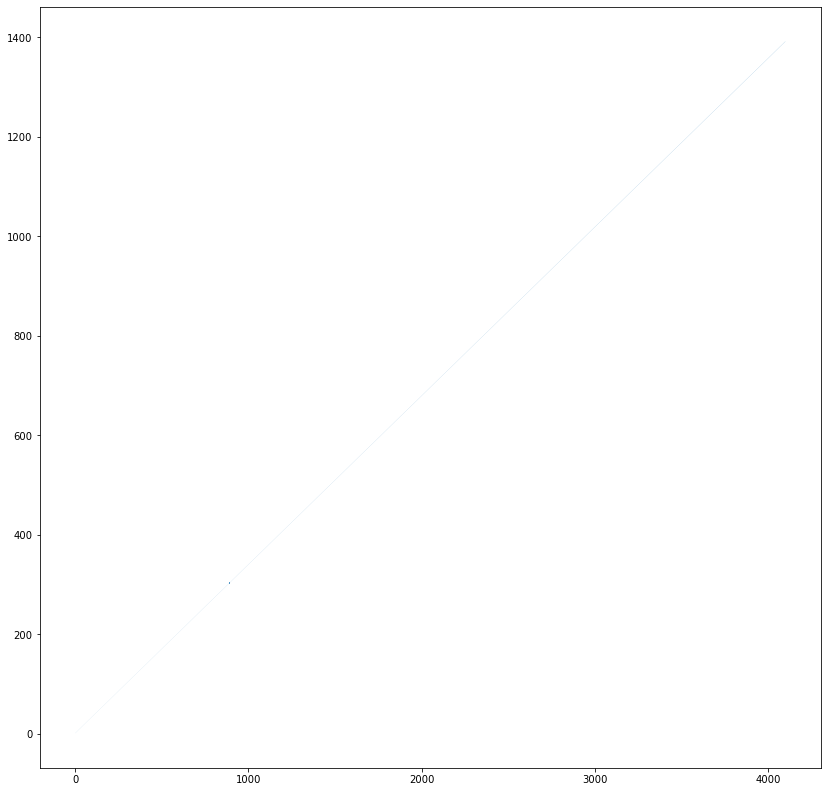

In [37]:
x = np.arange(0, 4100, 1)
y = slope*x + y_ax
ytop = (slope+slope_err)*x + y_ax + y_ax_err
ybottom = (slope-slope_err)*x + y_ax - y_ax_err

fig4, ax = plt.subplots(1, figsize=(14, 14))

ax.errorbar(channel_numbers, source_energies, xerr = channel_numbers_err, yerr=source_energies_err, linestyle='none')

ax.fill_between(x, ybottom, ytop)

plt.show()


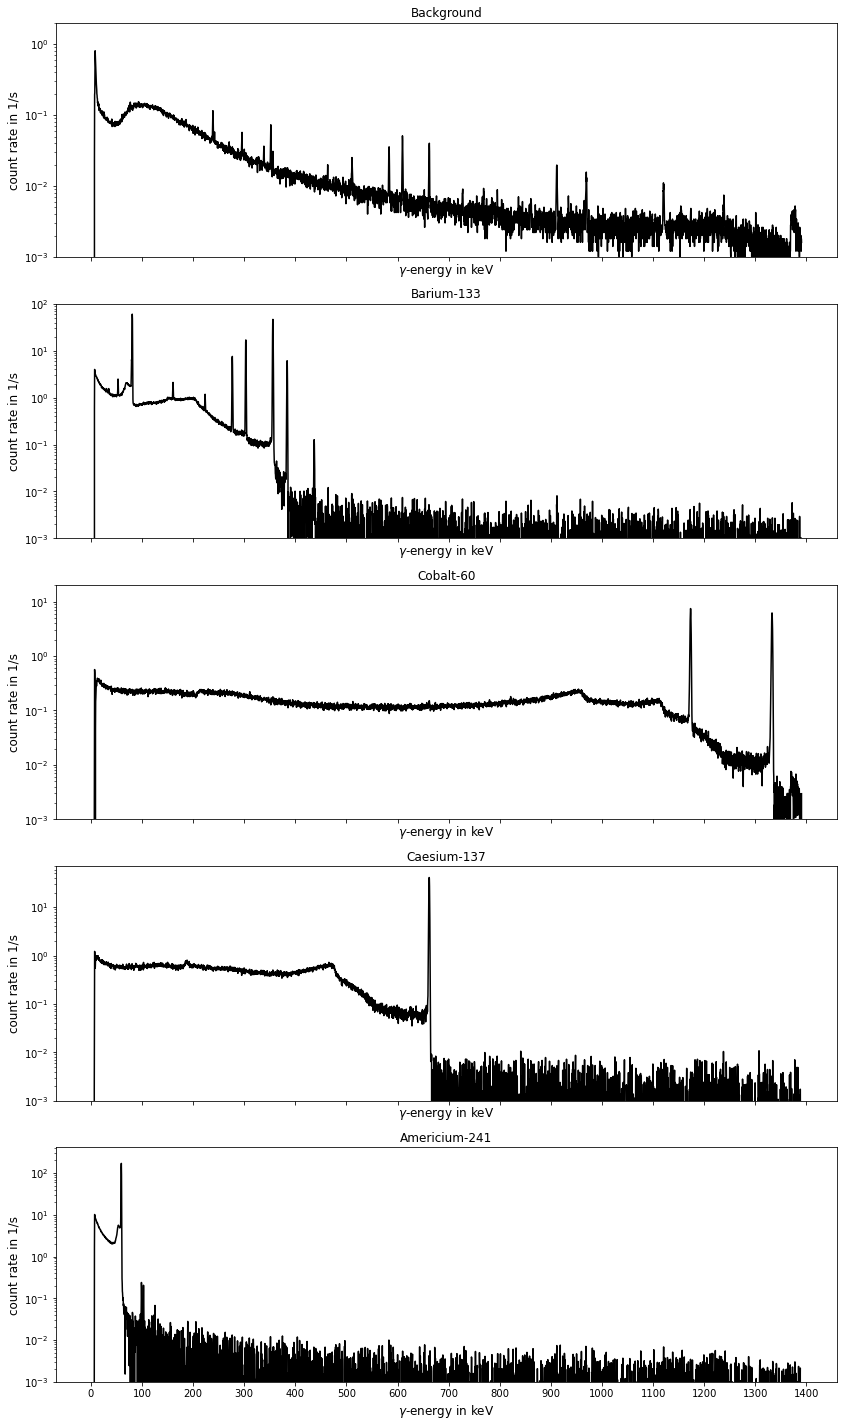

In [38]:
fig2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex = True, figsize=(14, 25))

fig2.add_subplot(111, frameon=False)

ax1.plot(energies, rate_Background, color = 'k')
ax1.set_yscale('log')
ax1.set_ylim(bottom=0.001, top=2)
ax1.set_xticks(np.arange(0, 1500, step=100))
ax1.set_title('Background', fontsize=12)
ax1.set_xlabel('$\gamma$-energy in keV', fontsize=12)
ax1.set_ylabel('count rate in 1/s', fontsize=12)

ax2.plot(energies, rate_GammaSpectrumBa133_red_zero, color = 'k')
ax2.set_yscale('log')
ax2.set_ylim(bottom=0.001, top=100)
ax2.set_xticks(np.arange(0, 1500, step=100))
ax2.set_title('Barium-133', fontsize=12)
ax2.set_xlabel('$\gamma$-energy in keV', fontsize=12)
ax2.set_ylabel('count rate in 1/s', fontsize=12)

ax3.plot(energies, rate_GammaSpectrumCo60_red_zero, color = 'k')
ax3.set_yscale('log')
ax3.set_ylim(bottom=0.001, top=20)
ax3.set_xticks(np.arange(0, 1500, step=100))
ax3.set_title('Cobalt-60', fontsize=12)
ax3.set_xlabel('$\gamma$-energy in keV', fontsize=12)
ax3.set_ylabel('count rate in 1/s', fontsize=12)

ax4.plot(energies, rate_GammaSpectrumCs137_red_zero, color = 'k')
ax4.set_yscale('log')
ax4.set_ylim(bottom=0.001, top=70)
ax4.set_xticks(np.arange(0, 1500, step=100))
ax4.set_title('Caesium-137', fontsize=12)
ax4.set_xlabel('$\gamma$-energy in keV', fontsize=12)
ax4.set_ylabel('count rate in 1/s', fontsize=12)

ax5.plot(energies, rate_GammaSpectrumAm241_red_zero, color = 'k')
ax5.set_yscale('log')
ax5.set_ylim(bottom=0.001)
ax5.set_xticks(np.arange(0, 1500, step=100))
ax5.set_title('Americium-241', fontsize=12)
ax5.set_xlabel('$\gamma$-energy in keV', fontsize=12)
ax5.set_ylabel('count rate in 1/s', fontsize=12)

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.show()
fig2.savefig('reduced_spectra.jpg')

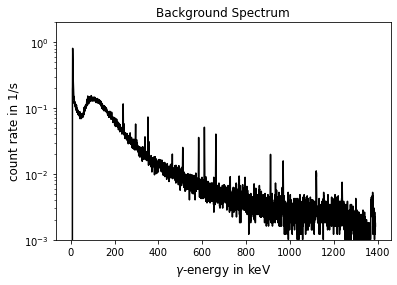

<Figure size 648x360 with 0 Axes>

In [39]:
plt.plot(energies, rate_Background, color = 'k')
plt.rcParams["figure.figsize"] = (9,5)
plt.yscale('log')
plt.ylim(bottom=0.001, top=2)
plt.xticks(np.arange(0, 1500, step=200))
plt.title('Background Spectrum', fontsize=12)
plt.xlabel('$\gamma$-energy in keV', fontsize=12)
plt.ylabel('count rate in 1/s', fontsize=12)
plt.show()
plt.savefig("Background.pdf")

# Calculating the Compton edge of Cs-137

In [40]:
m = 510.998950 #electron energy in keV
Cs137_peak_energy = Cs137_params[0][2] * slope + y_ax
Cs137_peak_energy_err = np.sqrt((slope * Cs137_params[1][2])**2 + (Cs137_params[0][2] * slope_err)**2 + y_ax_err**2)
Cs137_compton = Cs137_peak_energy*(1 - 1/(1 + 2*Cs137_peak_energy/m))
Cs137_compton_err = np.square(2*Cs137_peak_energy/(m + 2*Cs137_peak_energy)) * Cs137_peak_energy_err
print(Cs137_peak_energy, Cs137_peak_energy_err, Cs137_compton, Cs137_compton_err)

661.7723996134575 0.08893121964879731 477.44046341190256 0.04628874371494281


In [41]:
Cs137_back = Cs137_peak_energy - Cs137_compton
Cs137_back_err = np.sqrt(Cs137_peak_energy_err**2 + Cs137_compton_err**2)
print(Cs137_back, Cs137_back_err)

184.33193620155498 0.10025671859247284


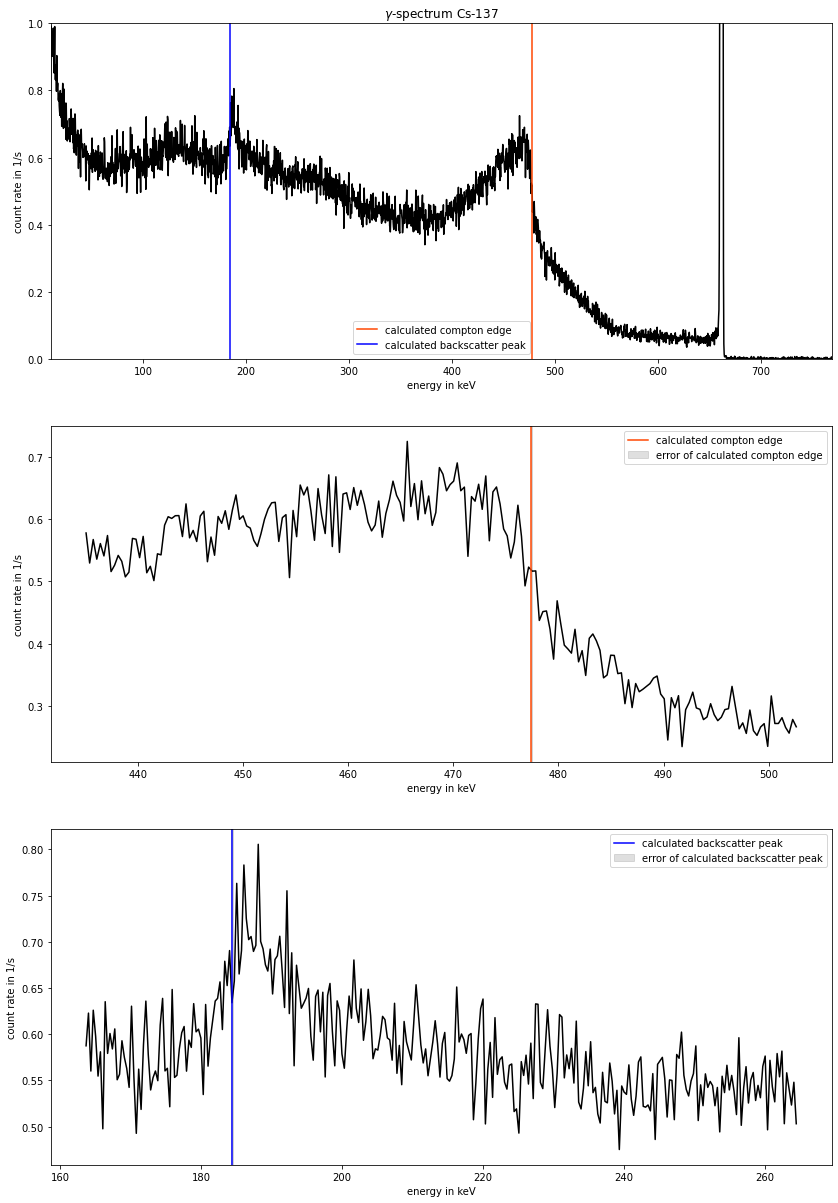

In [42]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 21))

ax1.plot(energies, rate_GammaSpectrumCs137_red, color='k')
ax1.axvline(Cs137_compton, label='calculated compton edge', color='orangered')
ax1.axvline(Cs137_peak_energy - Cs137_compton, label='calculated backscatter peak', color='b')
ax1.set_ylim(bottom=0, top=1)
ax1.set_xlim(left=10, right=769)
ax1.set_title('$\gamma$-spectrum Cs-137', fontsize=12)
ax1.set_xlabel('energy in keV')
ax1.set_ylabel('count rate in 1/s')
ax1.legend()

ax2.plot(energies[1280:1480], rate_GammaSpectrumCs137_red[1280:1480], color = 'k')
ax2.axvline(Cs137_compton, label='calculated compton edge', color='orangered')
ax2.axvspan(Cs137_compton - Cs137_compton_err, Cs137_compton + Cs137_compton_err, color='grey', alpha=0.25, label='error of calculated compton edge')
ax2.set_xlabel('energy in keV')
ax2.set_ylabel('count rate in 1/s')
ax2.legend()

ax3.plot(energies[480:778], rate_GammaSpectrumCs137_red[480:778], color = 'k')
ax3.axvline(Cs137_back, label='calculated backscatter peak', color='b')
ax3.axvspan(Cs137_back - Cs137_back_err, Cs137_back + Cs137_back_err, color='grey', alpha=0.25, label='error of calculated backscatter peak')
ax3.set_xlabel('energy in keV')
ax3.set_ylabel('count rate in 1/s')
ax3.legend()

# Calculating the activity of Cs-137 source

In [43]:
Cs137_integrated_count_rate = sum(rate_GammaSpectrumCs137_red[50:2000])
Cs137_integrated_count_rate_err = np.sqrt(sum(np.square(rate_GammaSpectrumCs137_red_err[50:2000])))
print(Cs137_integrated_count_rate, Cs137_integrated_count_rate_err)

1006.3707775908612 1.3535653658552227


In [102]:
# what about intrinsic efficiency?
def activity(r, d, w): # r = integrated_count_rate; d = distance; w = detector diameter
    theta = np.arctan(w/(2*(d+24.5)))
    geom = np.sin(theta/2)**2
    a = r/(geom)
    return a

def activity_err(r, d, w, r_err, d_err, w_err):
    theta = np.arctan(w/(2*(d+24.5)))
    A_del_r = 1/(np.sin(theta/2)**2)
    A_del_w = -r * np.cos(theta/2)/(np.sin(theta/2)**3 * (1 + (w/(2*(d+24.5)))**2) * 2*(d+24.5))
    A_del_d = -r * np.cos(theta/2) * (-w/(2*(d+24.5)**2))/(np.sin(theta/2)**3 * (1 + (w/(2*(d+24.5)))**2))
    y = np.sqrt((A_del_r * r_err)**2 + (A_del_w * w_err)**2 + (A_del_d * d_err)**2)
    return y

In [103]:
Cs137_activity = activity(Cs137_integrated_count_rate, 153, 47.3)
Cs137_activity_err = activity_err(Cs137_integrated_count_rate, 153, 47.3, Cs137_integrated_count_rate_err, 2, 0.05)
print(Cs137_activity, Cs137_activity_err)

229767.36756173937 5141.752489473983


# Estimating the irradiation dose

In [46]:
def geom_factor(d, w, h):
    y = np.arctan(w/(2*d))*np.sin(np.arctan(h/(2*d)))/np.pi
    return y

In [47]:
mu_a = 0.0032      # total mass absorbtion coefficient at 661 keV for water (in cm^2/g)
mu_cs = 0.004      # compton scattering coefficient at 661 keV for water (in cm^2/g)
mu = mu_a + mu_cs  # total mass attenuation coefficient at 661 keV for water (in cm^2/g)
dens_water = 0.997       # density of water in g/cm^3

In [48]:
# function for approximating interaction rate in human body
# a = activity of source in 1/s
# d = distance between body and source in cm
# w = average width of body in cm
# h = average shoulder hight in cm
# mu = total mass attenuation coefficient in cm^2/g
# dens = density of material (water) in g/cm^3
# depth = average depth of body in cm


def interaction_rate(a, d, w, h, mu, dens, depth):
    y = a * geom_factor(d, w, h) * (1 - np.exp(-mu * dens * depth))
    return y

In [49]:
Cs137_interaction_rate = interaction_rate(Cs137_activity, 300, 45, 150, mu, dens_water, 30)
print(Cs137_interaction_rate)

231.63152885786246


In [50]:
absorbed_energy = 8 * 3600 * Cs137_interaction_rate * (mu_a/mu * Cs137_peak_energy + mu_cs/mu * 0.5*Cs137_compton) * 1.60218e-16
absorbed_dose = absorbed_energy/(150*45*30*0.997*0.001)*100 # in rad
print(absorbed_energy, absorbed_dose)


4.5610863926827377e-07 2.2591658395843024e-07


In [51]:
absorbed_dose_nat = 0.024*8  # natural absorbed dose in 8 hours
print(absorbed_dose_nat)

0.192


# Characterization of the Semiconductor Detector

In [52]:
from scipy.signal import find_peaks,peak_widths
from scipy.optimize import curve_fit

In [53]:
data_CharacterizationCobalt60 = pd.read_csv("Data/CharacterizationCo60.Spe")
time_CharacterizationCobalt60 = np.array([int(s) for s in data_CharacterizationCobalt60['$SPEC_ID:'][8].split() if s.isdigit()])[0]
counts_CharacterizationCobalt60 = np.array(data_CharacterizationCobalt60['$SPEC_ID:'][11:4107], dtype=int)# - counts_Background * time_CharacterizationCobalt60/time_Background
counts_CharacterizationCobalt60[counts_CharacterizationCobalt60 < 0] = 0 # Remove abnormalities caused by background fluctuations
channels = np.arange(0,len(counts_CharacterizationCobalt60),1)
energies = slope * channels  +  y_ax

y_ax = 0.83939896
slope = 0.3392732
channels = np.arange(0,len(counts_CharacterizationCobalt60),1)

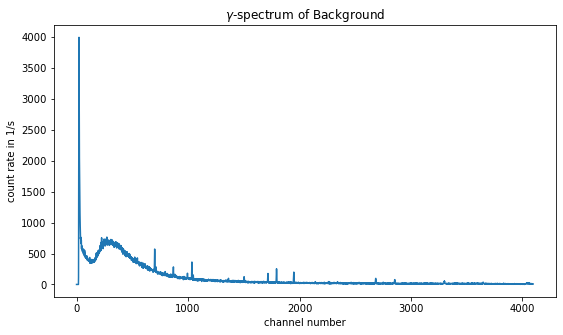

In [54]:
data_Background = pd.read_csv("Data/Background.Spe")
counts_Background = np.array(data_Background['$SPEC_ID:'][11:4107], dtype=int)
time_Background = np.array([int(s) for s in data_Background['$SPEC_ID:'][8].split() if s.isdigit()])[0]
rate_Background = counts_Background/time_Background
plt.plot(channels, counts_Background)
#plt.ylim(bottom=0, top=0.16)
plt.xlabel('channel number')
plt.ylabel('count rate in 1/s')
plt.title('$\gamma$-spectrum of Background')
plt.show()

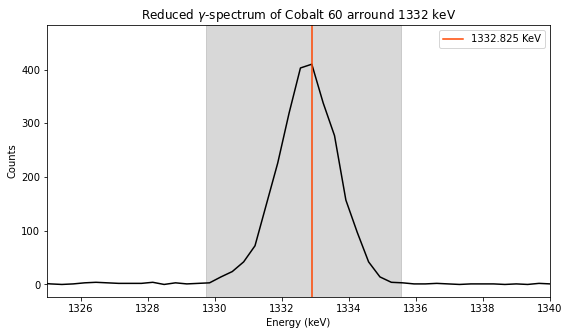

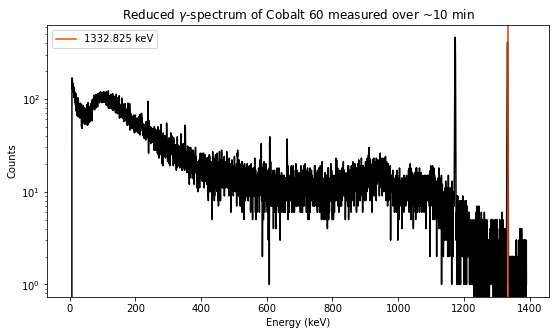

607


In [55]:
peaks = find_peaks(counts_CharacterizationCobalt60, height=200)
height = peaks[1]['peak_heights']
peak_pos = energies[peaks[0]]
width_full = peak_widths(counts_CharacterizationCobalt60, [peaks[0][2]], rel_height=0.993) #FWFM, relative height adjusted as noise confuses algo
FWHM = peak_widths(counts_CharacterizationCobalt60, [peaks[0][2]], rel_height=0.5)

FWHM_energy = slope * FWHM[0][0] +y_ax

begin = width_full[2][0] 
end = width_full[3][0]

begin_energy = begin * slope  +  y_ax
end_energy = end * slope  +  y_ax

plt.plot(energies, counts_CharacterizationCobalt60, color='k')
plt.axvline(peak_pos[2], label='1332.825 KeV', color='orangered')
plt.axvspan(begin_energy,end_energy, alpha=0.3, color='grey')
plt.xlim(left=1325,right=1340)
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Reduced $\gamma$-spectrum of Cobalt 60 arround 1332 keV')
plt.legend()
plt.savefig("cobalt1")
plt.show()

plt.semilogy(energies, counts_CharacterizationCobalt60, color='k')
plt.axvline(peak_pos[2], label='1332.825 keV', color='orangered')
plt.axvspan(begin_energy,end_energy, alpha=0.3, color='grey')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Reduced $\gamma$-spectrum of Cobalt 60 measured over ~10 min')
plt.legend()
plt.savefig("cobalt2")
plt.show()

print(time_CharacterizationCobalt60)

In [56]:
t = 775900800 #seconds
t12 = 166337300


counts_in_peak = np.sum(counts_CharacterizationCobalt60[int(begin):int(end)])
activity_Cobalt60 = 470 * 1000 #kBq - Bq
probability = 0.999988
AbsoluteEfficiency = counts_in_peak / (time_CharacterizationCobalt60 * activity_Cobalt60 * probability * 2**(-t/t12))
RelativeEfficiency = AbsoluteEfficiency / (1.2e-3)
print("Rel Eps = ", RelativeEfficiency)

#estimate detector efficiency @ anleitung
epsilon = 0.17 * (5.74)**3 /100
print("Calc Eps Anl = ", epsilon)
#estimate detector efficiency @ endcap
epsilon = 0.17 * (7.6)**3 /100
print("Calc Eps Endcap = ", epsilon)
#estimate detector efficiency @ old
epsilon = 0.17 * (4.73)**3 /100
print("Calc Eps Old = ", epsilon)


Rel Eps =  0.1921017774160333
Calc Eps Anl =  0.3215026808000001
Calc Eps Endcap =  0.7462591999999999
Calc Eps Old =  0.17990048890000007


In [57]:
FWHM1 = peak_widths(counts_CharacterizationCobalt60, [peaks[0][0]], rel_height=0.5)
FWHM1_energy = slope * FWHM1[0][0] + y_ax

FWHM2 = peak_widths(counts_CharacterizationCobalt60, [peaks[0][1]], rel_height=0.5)
FWHM2_energy = slope * FWHM2[0][0] + y_ax

FWHM_Vals = [FWHM1_energy, FWHM_energy]
FWHM_Pos = [energies[peaks[0]][0],energies[peaks[0]][2]]

print(FWHM_Pos)
print(FWHM_Vals)

[1173.0856910232862, 1332.899557599849]
[2.8789214376546246, 2.8318579345454937]


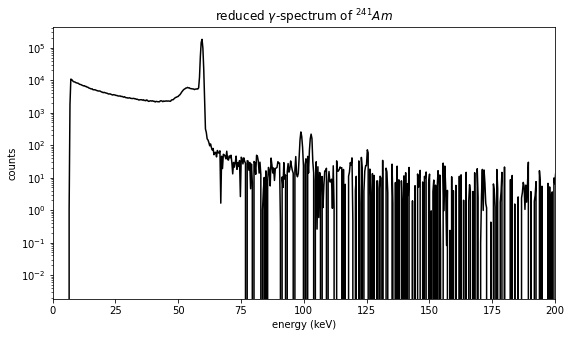

In [58]:
data_Am241 = pd.read_csv("Data/GammaSpectrumAm241.Spe")
time_Am241 = np.array([int(s) for s in data_Am241['$SPEC_ID:'][8].split() if s.isdigit()])[0]
counts_Am241 = np.array(data_Am241['$SPEC_ID:'][11:4107], dtype=int) - counts_Background * time_Am241/time_Background
plt.semilogy(energies, counts_Am241, color='k')
plt.xlabel('energy (keV)')
plt.ylabel('counts')
plt.xlim(0,200)
plt.title('reduced $\gamma$-spectrum of $^{241}Am$')
plt.show()

In [59]:
peaks = find_peaks(counts_Am241, height=10**5)
peak_pos = peaks[0]

FWHM = peak_widths(counts_Am241, peak_pos, rel_height=0.5)
FWHM_energy = slope * FWHM[0] +y_ax

peak_Am241 = energies[peak_pos]
FWHM_Am241 = FWHM_energy

print(peak_Am241)
print(FWHM_Am241)

[59.47823857]
[1.74559743]


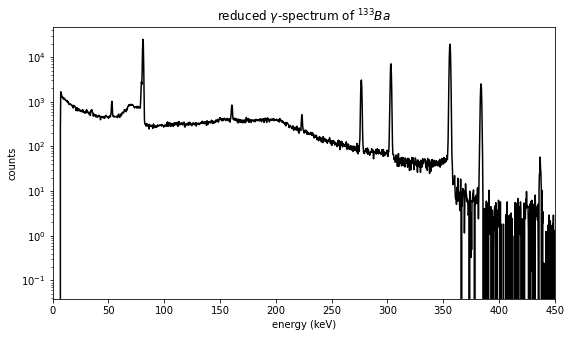

In [60]:
data_Ba133 = pd.read_csv("Data/GammaSpectrumBa133.Spe")
time_Ba133 = np.array([int(s) for s in data_Ba133['$SPEC_ID:'][8].split() if s.isdigit()])[0]
counts_Ba133 = np.array(data_Ba133['$SPEC_ID:'][11:4107], dtype=int) - counts_Background * time_Ba133/time_Background
plt.semilogy(energies, counts_Ba133, color='k')
plt.xlabel('energy (keV)')
plt.ylabel('counts')
plt.xlim(0,450)
plt.title('reduced $\gamma$-spectrum of $^{133}Ba$')
plt.show()

In [61]:
peaks = find_peaks(counts_Ba133, height=5*10**3)
peak_pos = peaks[0]

FWHM = peak_widths(counts_Ba133, peak_pos, rel_height=0.5)
FWHM_energy = slope * FWHM[0] +y_ax

peak_Ba133 = energies[peak_pos]
FWHM_Ba133 = FWHM_energy

print(peak_Ba133)
print(FWHM_Ba133)

[ 80.85461563 303.10107552 356.03305681]
[1.7950843  1.97180069 1.99864904]


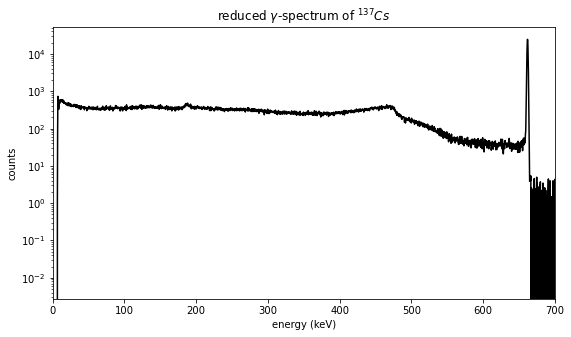

In [62]:
data_Cs137 = pd.read_csv("Data/GammaSpectrumCs137.Spe")
time_Cs137 = np.array([int(s) for s in data_Cs137['$SPEC_ID:'][8].split() if s.isdigit()])[0]
counts_Cs137 = np.array(data_Cs137['$SPEC_ID:'][11:4107], dtype=int) - counts_Background * time_Cs137/time_Background
plt.semilogy(energies, counts_Cs137, color='k')
plt.xlabel('energy (keV)')
plt.ylabel('counts')
plt.xlim(0,700)
plt.title('reduced $\gamma$-spectrum of $^{137}Cs$')
plt.show()

In [63]:
peaks = find_peaks(counts_Cs137, height=10**4)
peak_pos = peaks[0]

P2C_Cs137 = peaks[1]['peak_heights'][0] / counts_Cs137[1300]

FWHM = peak_widths(counts_Cs137, peak_pos, rel_height=0.5)
FWHM_energy = slope * FWHM[0] +y_ax

peak_Cs137 = energies[peak_pos]
FWHM_Cs137 = FWHM_energy

print(peak_Cs137)
print(FWHM_Cs137)
print(P2C_Cs137)

[661.74917949]
[2.30818598]
75.43284853712248


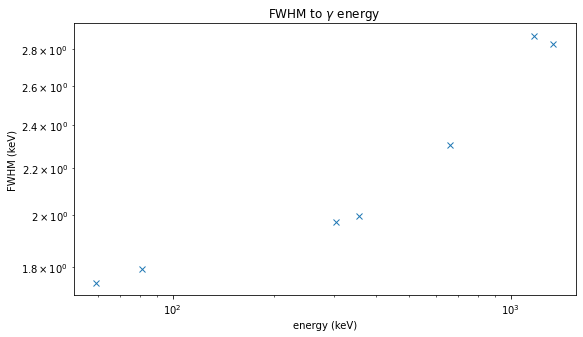

[2.87892144 2.83185793 1.74559743 1.7950843  1.97180069 1.99864904
 2.30818598]


In [64]:
peaks = np.concatenate((FWHM_Pos, peak_Am241, peak_Ba133, peak_Cs137))
FWHM = np.concatenate((FWHM_Vals, FWHM_Am241, FWHM_Ba133, FWHM_Cs137))
plt.loglog(peaks,FWHM,"x")
plt.xlabel('energy (keV)')
plt.ylabel('FWHM (keV)')
plt.title('FWHM to $\gamma$ energy ')
plt.show()

print(FWHM)

[1.71450905e-03 3.50859630e+00]


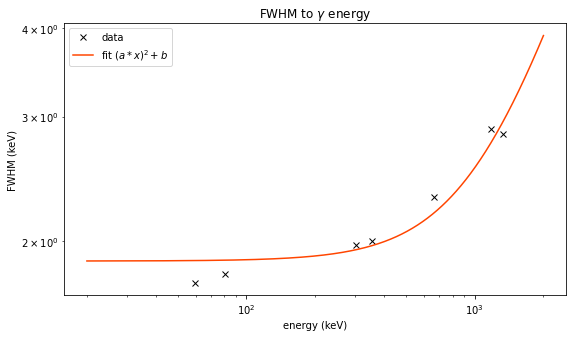

[1173.08569102 1332.8995576    59.47823857   80.85461563  303.10107552
  356.03305681  661.74917949]


In [65]:
def model(x, a, b):
    return (a * x)**2 + b

popt, pcov = curve_fit(model, peaks, FWHM**2)
print(popt)

x = np.arange(2*10,2*10**3,0.5)
fit = np.sqrt(model(x, *popt))

plt.loglog(peaks,FWHM,"kx", label="data")
plt.loglog(x,fit,label="fit $(a*x)^2 + b$", color='orangered')
plt.xlabel('energy (keV)')
plt.ylabel('FWHM (keV)')
plt.title('FWHM to $\gamma$ energy ')
plt.legend()
plt.savefig("FWHM.jpg")
plt.show()
print(peaks)

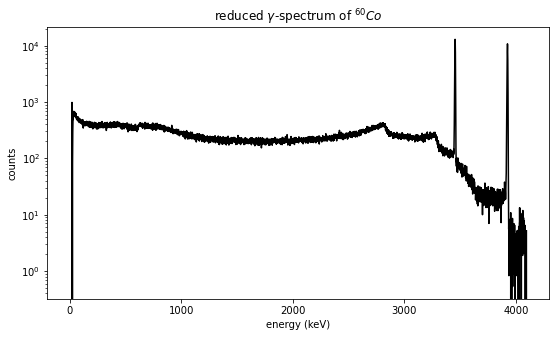

In [66]:
data_Co60 = pd.read_csv("Data/GammaSpectrumCo60.Spe")
time_Co60 = np.array([int(s) for s in data_Co60['$SPEC_ID:'][8].split() if s.isdigit()])[0]
counts_Co60 = np.array(data_Co60['$SPEC_ID:'][11:4107], dtype=int) - counts_Background * time_Co60/time_Background
plt.semilogy(channels, counts_Co60, color='k')
plt.xlabel('energy (keV)')
plt.ylabel('counts')
plt.title('reduced $\gamma$-spectrum of $^{60}Co$')
plt.show()

In [67]:
peaks = find_peaks(counts_Co60, height=10**4)
print(peaks[1]['peak_heights'])

P2C_Co60_13 = peaks[1]['peak_heights'][1]/counts_Co60[3200]
print(P2C_Co60_13)
P2C_Co60_11 = peaks[1]['peak_heights'][0]/counts_Co60[2500]
print(P2C_Co60_11)

[12960.95211154 10784.88563346]
39.35956129173082
47.068828448044975


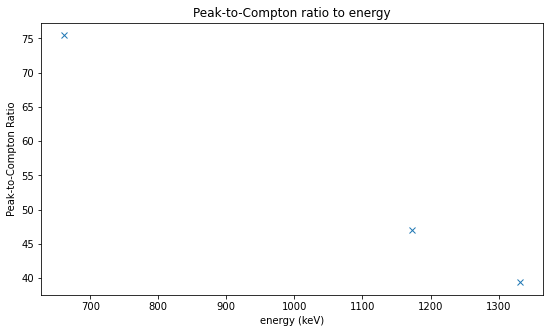

[1332, 1173, 661]


In [68]:
E = [1332, 1173, 661]
P2C = [P2C_Co60_13,P2C_Co60_11,P2C_Cs137]
plt.plot(E,P2C,'x')
plt.xlabel('energy (keV)')
plt.ylabel('Peak-to-Compton Ratio')
plt.title('Peak-to-Compton ratio to energy')
plt.savefig("P2C.jpg")
plt.show()

print(E)

# Mass Attenuation Coefficients

In [69]:
#Ba 133 sample
t = 10 #min

#Aluminium
d_al = 10.3 #cm
mu_al = np.array([0.5,0.85,2,4,6]) #+/-0.1 mm

#Copper
d_co = 10.3 #cm
mu_co = np.array([0.5,1,3,4.5]) #+/-0.1 mm

#Lead
d_le = 8.2 #cm
mu_le = np.array([1,1.5,2,3,4]) #+/-0.5 mm

#Molybdenum
d_mo = 9.1 #cm
mu_mo = np.array([0.4,1.1,1.9,3.4]) #+/-0.5 mm

In [70]:
def CPS(DataPath,a,b):
    Data = pd.read_csv(DataPath)
    t = int(str(Data['$SPEC_ID:'][8]).split()[0])
    Counts = np.array(Data['$SPEC_ID:'][11:4107], dtype=int)/t - rate_Background
    max_count = peak_seeker(Counts,a,b)[1]
    return max_count

from scipy.integrate import simps
def CPS_Integration(DataPath, a, b):
    Data = pd.read_csv(DataPath)
    t = int(str(Data['$SPEC_ID:'][8]).split()[0])
    CountsInt = np.array(Data['$SPEC_ID:'][11:4107], dtype=int)/t - rate_Background
    peak_width = 2
    CountsIntPeak = CountsInt[peak_seeker(CountsInt,a,b)[0]-peak_width:peak_seeker(CountsInt,a,b)[0]+peak_width]
    integrated_cps = simps(CountsIntPeak, x=None, dx=1, axis=-1, even='avg')
    return integrated_cps

def lin_fit(x,a,b):
    y = a*x+b
    return y

def residuals(f, popt, x, y, res_name):
    residuals = y - f(x,*popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    R_2 = 1 - (ss_res / ss_tot)
    plt.scatter(x,residuals, label='Residuals, R^2 ='+str(np.round(R_2,7)))
    plt.xlabel("x-Values")
    plt.ylabel("Diff y-f(x)")
    plt.ylim(-np.abs(max(residuals))*1.5, np.abs(max(residuals))*1.5)
    plt.legend(loc="upper right", prop={'size': 8})
    plt.gca().set_aspect(aspect=int(1/(np.abs(max(residuals))*1.5)))
    #plt.rcParams["figure.figsize"] = (8,1)
    plt.savefig(res_name+"Residuen.pdf", bbox_inches = "tight")
    print("R^2 =", R_2)

## Test Aluminium

In [71]:
CPS("Data/Mass Attenuation/Aluminium6mm.Spe",0,700) #Test

50.0037108154337

In [72]:
CPS_Integration("Data/Mass Attenuation/Aluminium6mm.Spe", 0, 700) #Test

106.90476694649769

In [73]:
CPS_Ratio_Array = []
I_0 = CPS("Data/Mass Attenuation/AluminumBaseline.Spe",0,700)
CPS_Ratio_Array.append(CPS("Data/Mass Attenuation/Aluminium0.5mm.Spe",0,700)/I_0)
CPS_Ratio_Array.append(CPS("Data/Mass Attenuation/Aluminium0.85mm.Spe",0,700)/I_0)
CPS_Ratio_Array.append(CPS("Data/Mass Attenuation/Aluminium2mm.Spe",0,700)/I_0)
CPS_Ratio_Array.append(CPS("Data/Mass Attenuation/Aluminium4mm.Spe",0,700)/I_0)
CPS_Ratio_Array.append(CPS("Data/Mass Attenuation/Aluminium6mm.Spe",0,700)/I_0)
CPS_Ratio_Array

[0.9861755968051861,
 0.9575300131987848,
 0.919446601731096,
 0.8178636856806649,
 0.747140790163979]

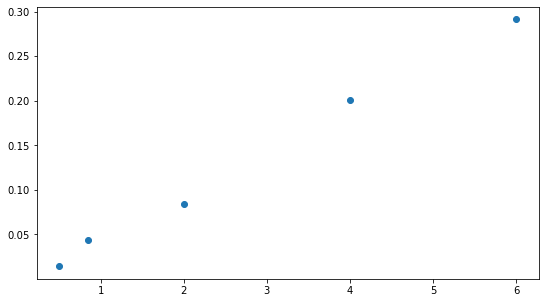

In [74]:
plt.scatter(mu_al,np.log(np.array(CPS_Ratio_Array)**-1))

[ 0.05029294 -0.00750944]


0.0018765756442823435

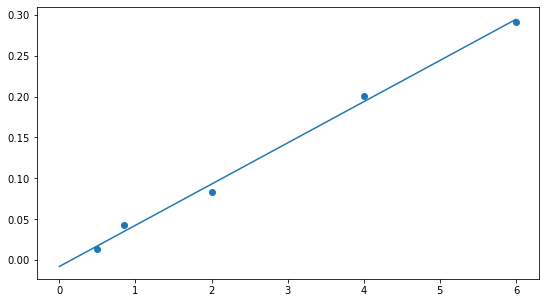

In [75]:
popt, pcov = curve_fit(lin_fit,mu_al,np.log(np.array(CPS_Ratio_Array)**-1))
print(popt)
mu_array = np.arange(0,6,0.001)
plt.plot(mu_array, lin_fit(mu_array,*popt))
plt.scatter(mu_al,np.log(np.array(CPS_Ratio_Array)**-1))
pcov[0][0]**0.5

## Mass Attenuation Fits

In [76]:
E_1 = 81 #keV
E_2 = 356.02 #keV

def attenuation_fit(file_array, I_0_File, mu, d, a, b):
    CPS_Ratio_Array = []
    I_0 = CPS(I_0_File,a,b)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS(file_array[i],a,b)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    print("The value of the mass attenuation coefficient is fitted as",popt[0] ,"+/-", pcov[0][0]**0.5)
    mu_array = np.arange(0,mu[-1:],0.001)
    plt.plot(mu_array, lin_fit(mu_array,*popt))
    plt.scatter(mu,np.log(np.array(CPS_Ratio_Array)**-1))
    
def attenuation_integration_fit(file_array, I_0_File, mu, d, a, b):
    CPS_Ratio_Array = []
    I_0 = CPS_Integration(I_0_File, a, b)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS_Integration(file_array[i],a,b)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    print("The value of the mass attenuation coefficient is fitted as",popt[0] ,"+/-", pcov[0][0]**0.5)
    mu_array = np.arange(0,mu[-1:],0.001)
    plt.plot(mu_array, lin_fit(mu_array,*popt), label="Linear Fit with u ="+str(np.round(popt[0],3))+"+/-"+ str(np.round(pcov[0][0]**0.5,3)))
    plt.scatter(mu,np.log(np.array(CPS_Ratio_Array)**-1), label="Data Points")
    plt.ylabel("Logarithmic Intensity Ratio ln(I0/I)")
    plt.xlabel("Thickness d in mm")
    plt.legend(loc="upper left")
    plt.savefig(str(I_0_File)+str(a)+str(b)+".pdf")
    plt.show()
    residuals(lin_fit, popt, mu, np.log(np.array(CPS_Ratio_Array)**-1), str(I_0_File)+str(a)+str(b))
    
def attenuation_integration_fit_bichannel(file_array, I_0_File, mu, d, a1, b1, a2, b2):
    #First Peak
    CPS_Ratio_Array = []
    I_0 = CPS_Integration(I_0_File, a1, b1)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS_Integration(file_array[i],a1,b1)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    print("The value of the mass attenuation coefficient for the peak between the channels",a1,"and",b1,"is fitted as",popt[0] ,"+/-", pcov[0][0]**0.5)
    mu_array = np.arange(0,mu[-1:],0.001)
    plt.plot(mu_array, lin_fit(mu_array,*popt), label="Linear Fit with u ="+str(np.round(popt[0],3))+"+/-"+ str(np.round(pcov[0][0]**0.5,3)))
    plt.scatter(mu,np.log(np.array(CPS_Ratio_Array)**-1), label="Data Points 81keV")
    #Second Peak
    CPS_Ratio_Array = []
    I_0 = CPS_Integration(I_0_File, a2, b2)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS_Integration(file_array[i],a2,b2)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    print("The value of the mass attenuation coefficient for the peak between the channels",a2,"and",b2,"is fitted as",popt[0] ,"+/-", pcov[0][0]**0.5)
    mu_array = np.arange(0,mu[-1:],0.001)
    plt.plot(mu_array, lin_fit(mu_array,*popt), label="Linear Fit with u ="+str(np.round(popt[0],3))+"+/-"+ str(np.round(pcov[0][0]**0.5,3)))
    plt.scatter(mu,np.log(np.array(CPS_Ratio_Array)**-1), label="Data Points 356.02keV")
    #Plot
    plt.ylabel("Logarithmic Intensity Ratio ln(I0/I)")
    plt.xlabel("Thickness d in mm")
    plt.legend(loc="upper left")
    plt.savefig(str(I_0_File)+"Bichannel.pdf")
    plt.show()
    #Residuals 1st Peak
    CPS_Ratio_Array = []
    I_0 = CPS_Integration(I_0_File, a1, b1)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS_Integration(file_array[i],a1,b1)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    residuals(lin_fit, popt, mu, np.log(np.array(CPS_Ratio_Array)**-1), str(I_0_File)+str(a1)+str(b1)+"BiChannel")
    #Residuals 2nd Peak
    CPS_Ratio_Array = []
    I_0 = CPS_Integration(I_0_File, a2, b2)
    for i in range(len(file_array)):
        CPS_Ratio_Array.append(CPS_Integration(file_array[i],a2,b2)/I_0)
    popt, pcov = curve_fit(lin_fit,mu,np.log(np.array(CPS_Ratio_Array)**-1))
    residuals(lin_fit, popt, mu, np.log(np.array(CPS_Ratio_Array)**-1), str(I_0_File)+str(a2)+str(b2)+"BiChannel")

### Aluminium

The value of the mass attenuation coefficient is fitted as 0.05029294408960732 +/- 0.0018765756442823435


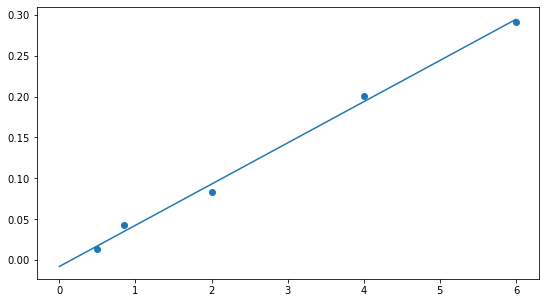

In [77]:
files_aluminium = ["Data/Mass Attenuation/Aluminium0.5mm.Spe","Data/Mass Attenuation/Aluminium0.85mm.Spe","Data/Mass Attenuation/Aluminium2mm.Spe","Data/Mass Attenuation/Aluminium4mm.Spe","Data/Mass Attenuation/Aluminium6mm.Spe"]
attenuation_fit(files_aluminium,"Data/Mass Attenuation/AluminumBaseline.Spe",mu_al, d_al, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.025066249162427567 +/- 0.002444689612825341


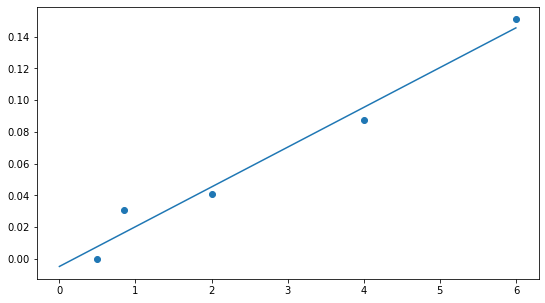

In [78]:
attenuation_fit(files_aluminium,"Data/Mass Attenuation/AluminumBaseline.Spe",mu_al, d_al, 1020, 1080)

The value of the mass attenuation coefficient is fitted as 0.048272070844740445 +/- 0.002017173081655292


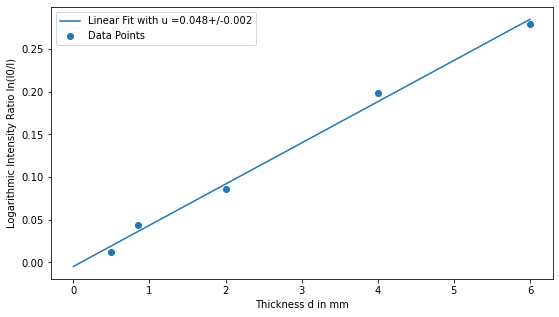

R^2 = 0.9947886925419585


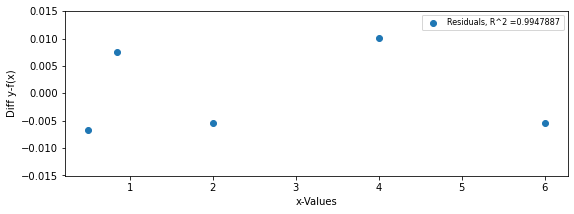

In [79]:
attenuation_integration_fit(files_aluminium,"Data/Mass Attenuation/AluminumBaseline.Spe",mu_al, d_al, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.02557266453713991 +/- 0.0016652700647842194


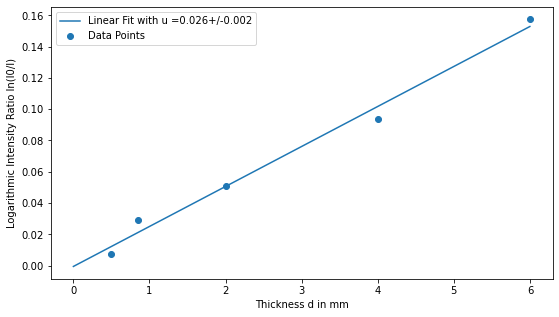

R^2 = 0.987438284880889


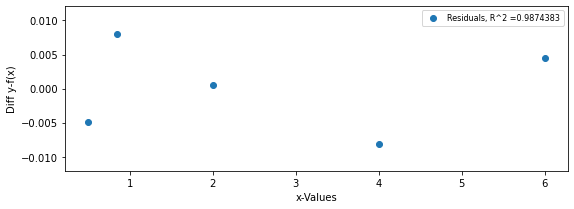

In [80]:
attenuation_integration_fit(files_aluminium,"Data/Mass Attenuation/AluminumBaseline.Spe",mu_al, d_al, 1020, 1080)

The value of the mass attenuation coefficient for the peak between the channels 230 and 250 is fitted as 0.048272070844740445 +/- 0.002017173081655292
The value of the mass attenuation coefficient for the peak between the channels 1020 and 1080 is fitted as 0.02557266453713991 +/- 0.0016652700647842194


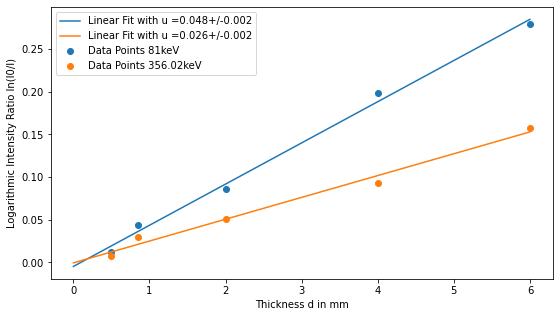

R^2 = 0.9947886925419585
R^2 = 0.987438284880889


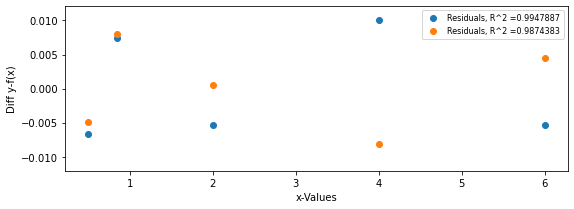

In [81]:
attenuation_integration_fit_bichannel(files_aluminium,"Data/Mass Attenuation/AluminumBaseline.Spe",mu_al, d_al, 230, 250, 1020, 1080)

### Lead

The value of the mass attenuation coefficient is fitted as 0.31398235703947075 +/- 0.09564222776750544


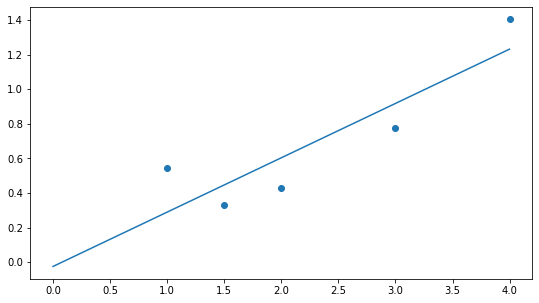

In [82]:
path = "Data/Mass Attenuation/"
files_lead = [path+"Lead1mm.Spe",path+"Lead1.5mm.Spe",path+"Lead2mm.Spe",path+"Lead3mm.Spe",path+"Lead4mm.Spe"]
attenuation_fit(files_lead,path+"LeadBaseline.Spe",mu_le, d_le, 240, 245)

The value of the mass attenuation coefficient is fitted as 0.3428200172961827 +/- 0.09556984999114818


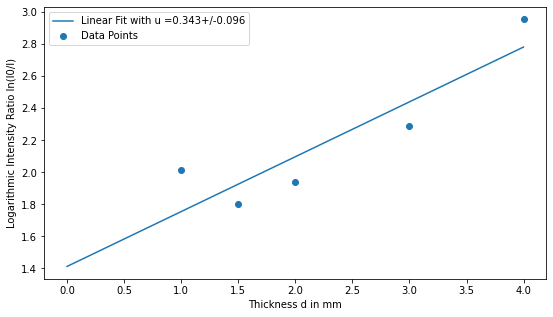

R^2 = 0.8109330133160665


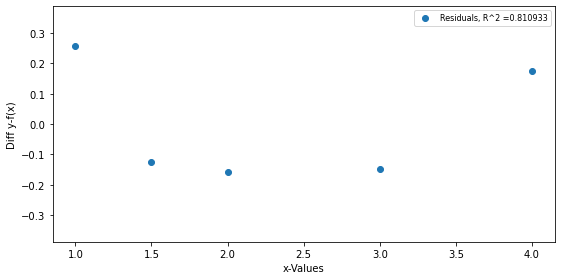

In [83]:
attenuation_integration_fit(files_lead,path+"LeadBaseline.Spe",mu_le, d_le, 240, 245)

In [84]:
#attenuation_integration_fit(files_lead,path+"LeadBaseline.Spe",mu_le, d_le, 1020, 1080)

### Copper

The value of the mass attenuation coefficient is fitted as 0.5797073070044869 +/- 0.0016490811640555041


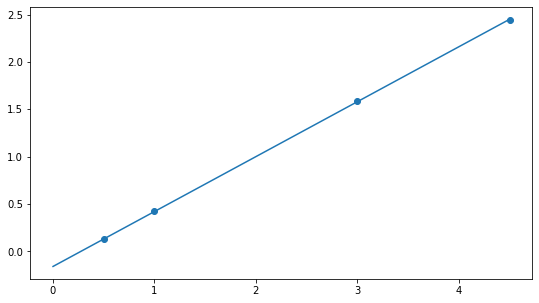

In [85]:
files_copper = [path+"Copper0.5mm.Spe",path+"Copper1mm.Spe",path+"Copper3mm.Spe",path+"Copper4.5.Spe"]
attenuation_fit(files_copper,path+"AluminumBaseline.Spe",mu_co, d_co, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.08824872250882164 +/- 0.0024065727162577454


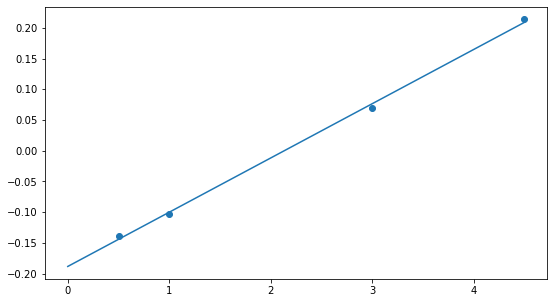

In [86]:
attenuation_fit(files_copper,path+"AluminumBaseline.Spe",mu_co, d_co, 1020, 1080)

The value of the mass attenuation coefficient is fitted as 0.570122362474826 +/- 0.002353724125002879


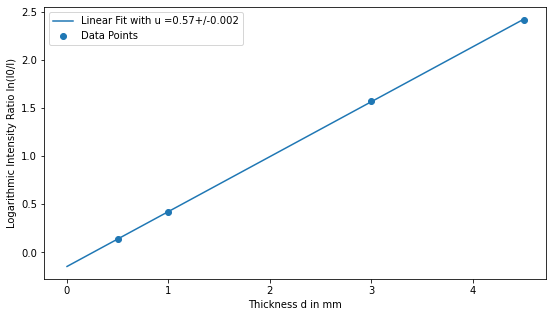

R^2 = 0.999965912893585


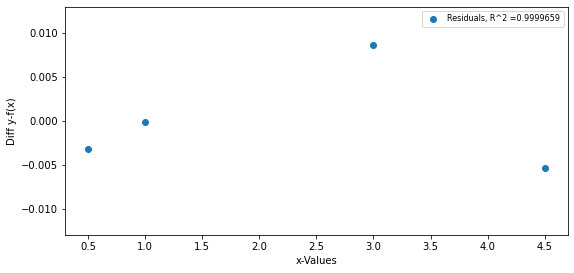

In [87]:
attenuation_integration_fit(files_copper,path+"AluminumBaseline.Spe",mu_co, d_co, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.08643608826530462 +/- 0.0018920225500400486


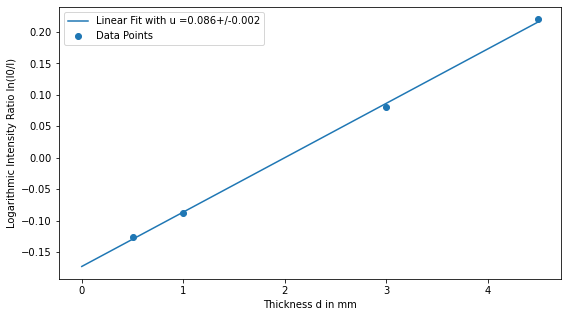

R^2 = 0.9990426374784327


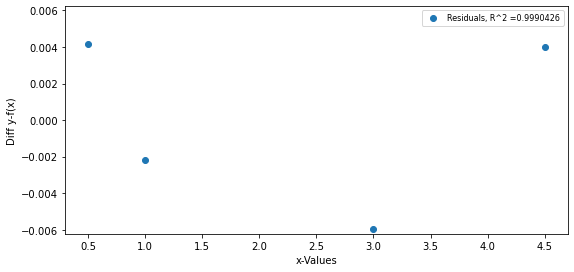

In [88]:
attenuation_integration_fit(files_copper,path+"AluminumBaseline.Spe",mu_co, d_co, 1020, 1080)

The value of the mass attenuation coefficient for the peak between the channels 230 and 250 is fitted as 0.570122362474826 +/- 0.002353724125002879
The value of the mass attenuation coefficient for the peak between the channels 1020 and 1080 is fitted as 0.08643608826530462 +/- 0.0018920225500400486


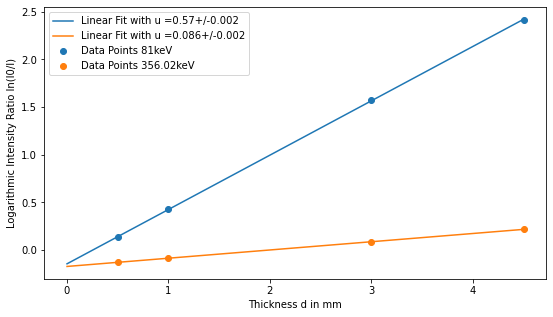

R^2 = 0.999965912893585
R^2 = 0.9990426374784327


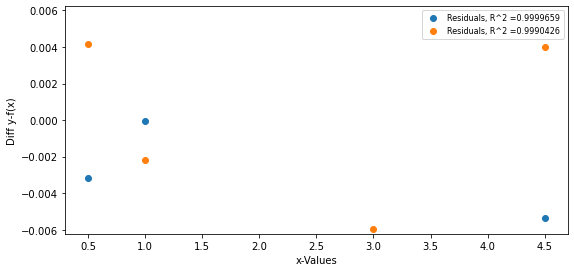

In [89]:
attenuation_integration_fit_bichannel(files_copper,path+"CopperBaseline.Spe",mu_co, d_co, 230, 250,1020,1080)

### Molybdenum

The value of the mass attenuation coefficient is fitted as 1.2527629344001903 +/- 0.14234256513035662


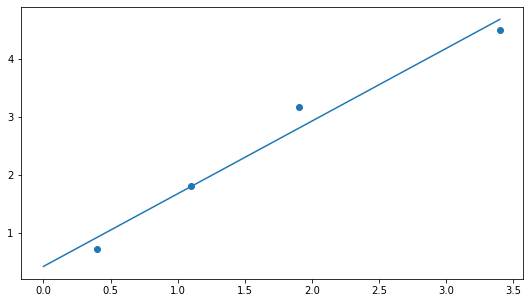

In [90]:
files_molybdenum = [path+"Molybdenum0.4mm.Spe",path+"Molybdenum1.1mm.Spe",path+"Molybdenum1.9mm.Spe",path+"Molybdenum3.4mm.Spe"]
attenuation_fit(files_molybdenum,path+"MolybdenumBaseline.Spe",mu_mo, d_mo, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.10897855254879958 +/- 0.0032616317093979103


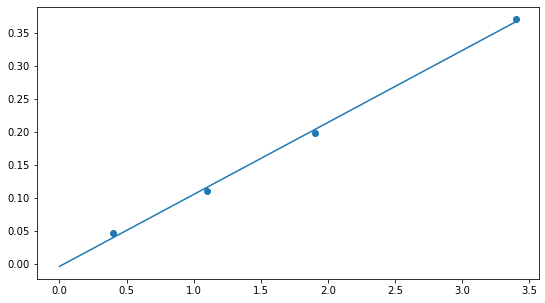

In [91]:
attenuation_fit(files_molybdenum,path+"MolybdenumBaseline.Spe",mu_mo, d_mo, 1020, 1080)

The value of the mass attenuation coefficient is fitted as 1.1474949638499816 +/- 0.1639790137285071


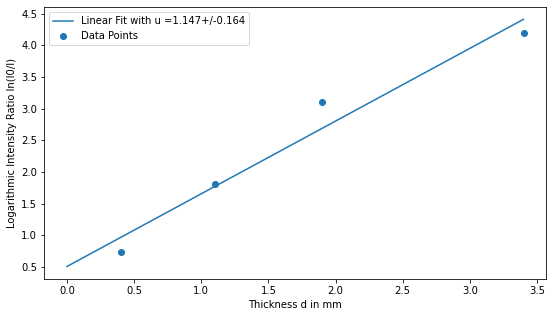

R^2 = 0.9607607906331552


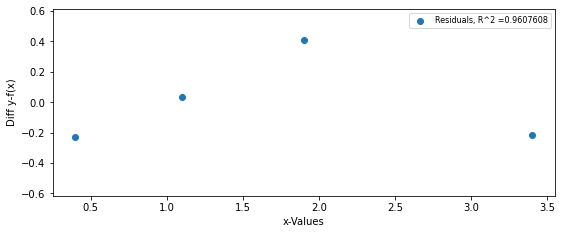

In [92]:
attenuation_integration_fit(files_molybdenum,path+"MolybdenumBaseline.Spe",mu_mo, d_mo, 230, 250)

The value of the mass attenuation coefficient is fitted as 0.10832313648098943 +/- 0.004214963822295572


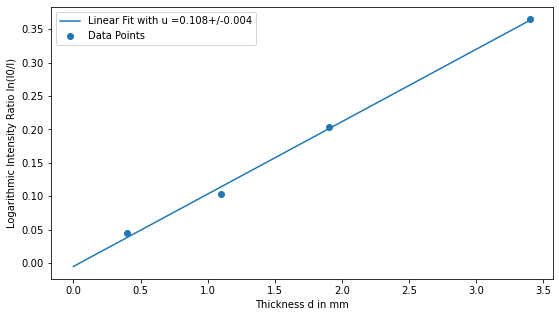

R^2 = 0.9969810055005763


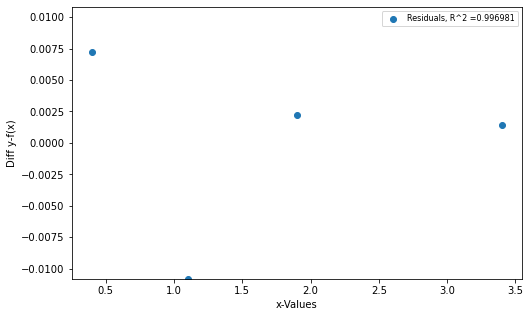

In [93]:
attenuation_integration_fit(files_molybdenum,path+"MolybdenumBaseline.Spe",mu_mo, d_mo, 1020, 1080)

The value of the mass attenuation coefficient for the peak between the channels 230 and 250 is fitted as 1.1474949638499816 +/- 0.1639790137285071
The value of the mass attenuation coefficient for the peak between the channels 1020 and 1080 is fitted as 0.10832313648098943 +/- 0.004214963822295572


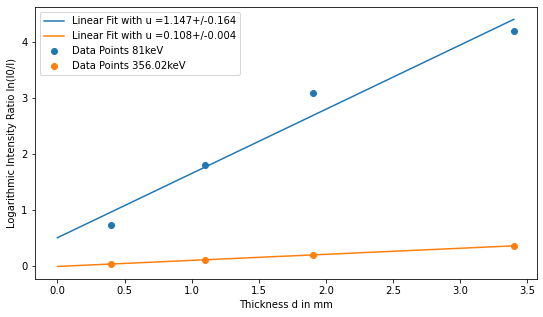

R^2 = 0.9607607906331552
R^2 = 0.9969810055005763


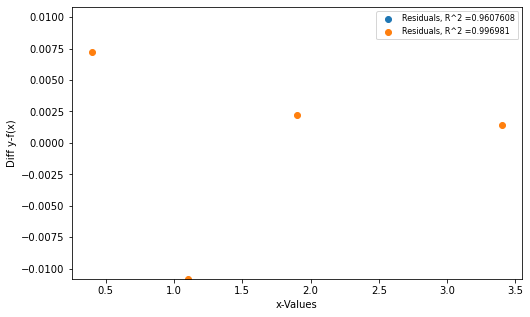

In [94]:
attenuation_integration_fit_bichannel(files_molybdenum,path+"MolybdenumBaseline.Spe",mu_mo, d_mo, 230, 250, 1020, 1080)

## Cross Section Dependance

In [95]:
import scipy.constants as cs
#Atomic Numbers
Z_al = 13
Z_le = 82
Z_co = 29
Z_mo = 42

#Densities in g/mm^3
rho_al = 2.7/(10**3)
rho_le = 11.34/(10**3)
rho_co = 8.96/(10**3)
rho_mo = 10.28/(10**3)

#Molar Masses g/mol
A_al = 26.98
A_le = 207.19
A_co = 63.54
A_mo = 95.94

#Measured Absorption Coefficients 1/mm
mu_al = np.array([0.048272070844740445,0.02557266453713991])
mu_co = np.array([0.570122362474826,0.08643608826530462])
mu_mo = np.array([1.1474949638499816,0.10832313648098943])
mu_le = 0.3428200172961827

#Energies
E = np.array([E_1,E_2])

def sigma_measured(mu,rho,A):
    return mu*A/(cs.N_A*(rho))

#Fit Models
def sigma_fit_al(E, alpha, sigma_noise):
    Z = 13
    n = 4
    m = 7/2
    sigma = alpha*Z**n/(E**m)+sigma_noise
    return sigma

def sigma_fit_le(E, alpha, sigma_noise):
    Z = 82
    n = 4
    m = 7/2
    sigma = alpha*Z**n/(E**m)+sigma_noise
    return sigma

def sigma_fit_co(E, alpha, sigma_noise):
    Z = 29
    n = 4
    m = 7/2
    sigma = alpha*Z**n/(E**m)+sigma_noise
    return sigma

def sigma_fit_mo(E, alpha, sigma_noise):
    Z = 42
    n = 4
    m = 7/2
    sigma = alpha*Z**n/(E**m)+sigma_noise
    return sigma

In [96]:
sigma_measured(mu_al,rho_al,A_al)

array([8.00982834e-22, 4.24329534e-22])

[6.34325877e-20 4.22201760e-22]
[[inf inf]
 [inf inf]]
[8.00982834e-22 4.24329534e-22]


/home/santi/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


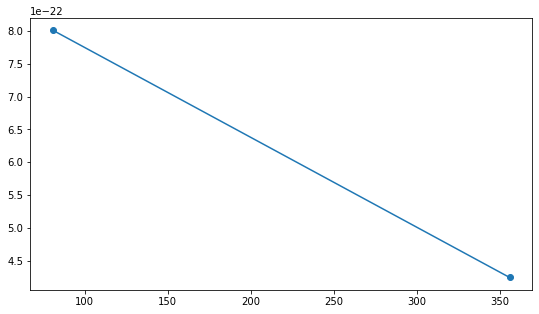

In [97]:
popt, pcov = curve_fit(sigma_fit_al,E,sigma_measured(mu_al,rho_al,A_al))
plt.scatter(E,sigma_measured(mu_al,rho_al,A_al))
plt.plot(E,sigma_fit_al(E,*popt))
print(popt)
print(pcov)
print(sigma_measured(mu_al,rho_al,A_al))

[3.87350508e-20 9.85672841e-22]
[[inf inf]
 [inf inf]]
[6.71361410e-21 1.01784911e-21]


/home/santi/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


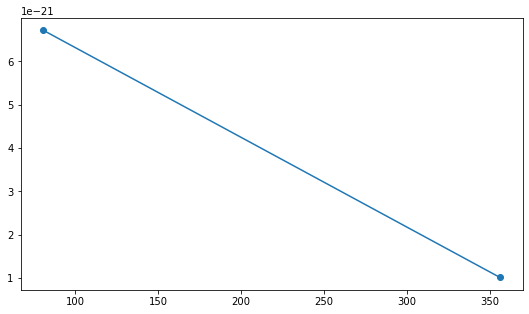

In [98]:
popt, pcov = curve_fit(sigma_fit_co,E,sigma_measured(mu_co,rho_co,A_co))
plt.scatter(E,sigma_measured(mu_co,rho_co,A_co))
plt.plot(E,sigma_fit_co(E,*popt))
print(popt)
print(pcov)
print(sigma_measured(mu_co,rho_co,A_co))

/home/santi/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[2.48937291e-20 1.58773884e-21]
[[inf inf]
 [inf inf]]
[1.77830597e-20 1.67871482e-21]


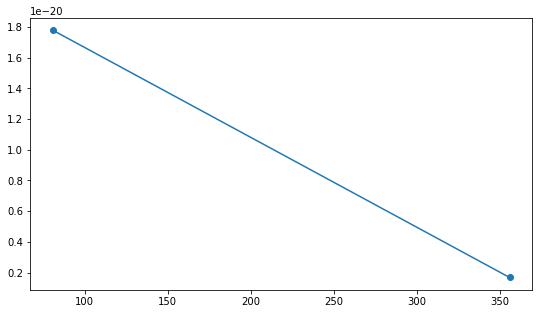

In [99]:
popt, pcov = curve_fit(sigma_fit_mo,E,sigma_measured(mu_mo,rho_mo,A_mo))
plt.scatter(E,sigma_measured(mu_mo,rho_mo,A_mo))
plt.plot(E,sigma_fit_mo(E,*popt))
print(popt)
print(pcov)
print(sigma_measured(mu_mo,rho_mo,A_mo))